In [1]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from math import floor
import random

In [2]:
nPoints = 1000

In [3]:
xPlot = [(float(i)/float(nPoints) - 0.5) for i in range(nPoints+1)]
X = [[s] for s in xPlot]

np.random.seed(1)
Y = [s+np.random.normal(scale = 0.1) for s in xPlot]

<function matplotlib.pyplot.show>

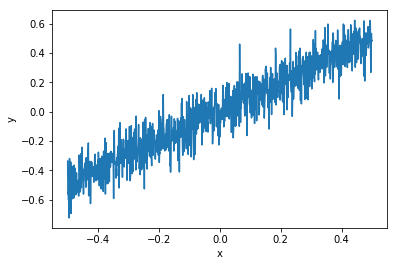

In [4]:
plot.plot(xPlot, Y)
plot.axis('tight')
plot.xlabel('x')
plot.ylabel('y')
plot.show

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=4)
len_x_train = len(X_train)
len_x_test = len(X_test)
len_y_train = len(Y_train)
len_y_test = len(Y_test)

print(f'len_x_train = {len_x_train}')
print(f'len_x_test = {len_x_test}')
print(f'len_y_train = {len_y_train}')
print(f'len_y_trst = {len_y_test}')

len_x_train = 700
len_x_test = 301
len_y_train = 700
len_y_trst = 301


i = 0, clf.best_params_ = {'C': 1, 'kernel': 'linear'}, clf.best_score_ = 0.009663138111948485
i = 1, clf.best_params_ = {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}, clf.best_score_ = 0.009675843152031504
i = 2, clf.best_params_ = {'C': 1, 'kernel': 'linear'}, clf.best_score_ = 0.00965831178029958
i = 3, clf.best_params_ = {'C': 1, 'kernel': 'linear'}, clf.best_score_ = 0.0096431119153278
i = 4, clf.best_params_ = {'C': 1, 'kernel': 'linear'}, clf.best_score_ = 0.009650982642560462
i = 5, clf.best_params_ = {'C': 1000, 'kernel': 'linear'}, clf.best_score_ = 0.00966446198693825
i = 6, clf.best_params_ = {'C': 10, 'kernel': 'linear'}, clf.best_score_ = 0.009648835441560177
i = 7, clf.best_params_ = {'C': 10, 'kernel': 'linear'}, clf.best_score_ = 0.0096586422510062
i = 8, clf.best_params_ = {'C': 1, 'kernel': 'linear'}, clf.best_score_ = 0.009644602145213548
i = 9, clf.best_params_ = {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}, clf.best_score_ = 0.009642642865838514
i = 10, clf.best_para

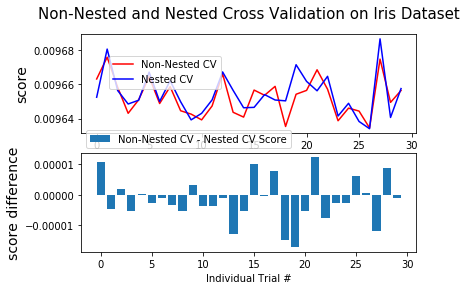

In [18]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import numpy as np
import operator
%matplotlib inline

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# Number of random trials
NUM_TRIALS = 30

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVR()

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

param_dict = {}
# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
    inner_cv = KFold(n_splits=10, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=10, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=tuned_parameters, cv=inner_cv, scoring = 'neg_mean_squared_error')
    clf.fit(X, Y)
    non_nested_scores[i] = -clf.best_score_
    print(f'i = {i}, clf.best_params_ = {clf.best_params_}, clf.best_score_ = {-clf.best_score_}')
    best_params = str(clf.best_params_)
    
    # Record the parameter count
    if(best_params in param_dict):
        param_dict[best_params] += 1
    else:
        param_dict[best_params] = 1
    
    # Nested CV with parameter optimization
    nested_score = -cross_val_score(clf, X=X, y=Y, cv=outer_cv, scoring = 'neg_mean_squared_error')
    nested_scores[i] = nested_score.mean()

print(f"=============================")
sorted_param_dict = sorted(param_dict.items(), key=operator.itemgetter(1))
for x in sorted_param_dict:
    print(f'{x[0]}, num = {x[1]}')

print(f"=============================")
print(f'mean of nested_score = {nested_score.mean()}')
print(f'mean of non_nested_scores = {non_nested_scores.mean()}')
score_difference = non_nested_scores - nested_scores

print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()